## Python ANOVA: 3 Ways to Carry out Two-Way ANOVA 
This is the Jupyter Notebook for Two-Way ANOVA using Python. This Notebook contains the code for calculating the ANOVA table "by hand".

Note, it has been updated to use seaborn to create an interaction plot instead of Statsmodels:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress Warnings (not in the blog post)
import warnings
warnings.filterwarnings("ignore")

from scipy import stats

### Load the data set from URL
Here we load the dataset from an URL, instead of from the harddrive:

In [2]:
data = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv'

df = pd.read_csv(data, index_col=0)
df.head()

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5


### Interaction plot using Seaborn

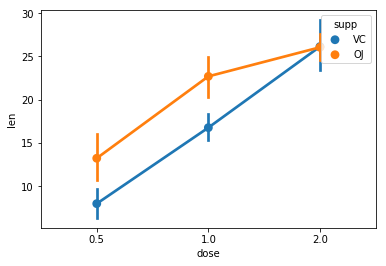

In [3]:
ax = sns.pointplot(x='dose', y='len', hue='supp', data=df)

### Calculating the Degrees of Freedom

In [4]:
N = len(df.len)
df_a = len(df.supp.unique()) - 1
df_b = len(df.dose.unique()) - 1
df_axb = df_a*df_b 
df_w = N - (len(df.supp.unique())*len(df.dose.unique()))

### Calculating the Grand Mean

In [5]:
grand_mean = df['len'].mean()

### Sum of Squares

In [6]:
# Sum of Squares A
ssq_a = sum([(df[df.supp == l].len.mean() - grand_mean)**2 for l in df.supp])
# Sum of Squares B
ssq_b = sum([(df[df.dose ==l].len.mean() - grand_mean)**2 for l in df.dose])
# Sum of Squares T
ssq_t = sum((df.len - grand_mean)**2)

### Sum of Squares Within and Interaction

In [7]:
vc = df[df.supp == 'VC']
oj = df[df.supp == 'OJ']
vc_dose_means = [vc[vc.dose == d].len.mean() for d in vc.dose]
oj_dose_means = [oj[oj.dose == d].len.mean() for d in oj.dose]
ssq_w = sum((oj.len - oj_dose_means)**2) +sum((vc.len - vc_dose_means)**2)
# Interaction
ssq_axb = ssq_t - ssq_a - ssq_b - ssq_w

### Mean Square Errors

In [8]:
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w

### Calculating F

In [9]:
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w

### Obtaining the P-values
Here we get the P-values using SciPy:

In [10]:
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

### Creating the ANOVA Table

In [11]:
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}

columns=['sum_sq', 'df', 'F', 'PR(>F)']

aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['supp', 'dose', 
                          'supp:dose', 'Residual'])

### Effect Sizes
Here we get the eta squared and omega squared effect sizes and add it to the anova table and print the results:

In [12]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov


eta_squared(aov_table1)
omega_squared(aov_table1)
print(aov_table1)

                sum_sq  df        F       PR(>F)    eta_sq  omega_sq
supp        205.350000   1   15.572  0.000231183  0.059484  0.055452
dose       2426.434333   2       92  4.04629e-18  0.702864  0.692579
supp:dose   108.319000   2  4.10699    0.0218603  0.031377  0.023647
Residual    712.106000  54      NaN          NaN       NaN       NaN
